In [65]:
#importing the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import re
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import nltk
from nltk import sent_tokenize, word_tokenize, PorterStemmer
from nltk.corpus import stopwords 


import warnings
warnings.filterwarnings("ignore")

In [66]:
df = pd.read_csv("E:\Imarticus\Machine Learning\Paper2/Sentiment.csv")

In [67]:
df

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,candidate_gold,...,relevant_yn_gold,retweet_count,sentiment_gold,subject_matter_gold,text,tweet_coord,tweet_created,tweet_id,tweet_location,user_timezone
0,1,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6578,None of the above,1.0000,NaN,...,NaN,5,NaN,NaN,RT @NancyLeeGrahn: How did everyone feel about...,NaN,2015-08-07 09:54:46 -0700,629697200650592256,NaN,Quito
1,2,Scott Walker,1.0000,yes,1.0000,Positive,0.6333,None of the above,1.0000,NaN,...,NaN,26,NaN,NaN,RT @ScottWalker: Didn't catch the full #GOPdeb...,NaN,2015-08-07 09:54:46 -0700,629697199560069120,NaN,NaN
2,3,No candidate mentioned,1.0000,yes,1.0000,Neutral,0.6629,None of the above,0.6629,NaN,...,NaN,27,NaN,NaN,RT @TJMShow: No mention of Tamir Rice and the ...,NaN,2015-08-07 09:54:46 -0700,629697199312482304,NaN,NaN
3,4,No candidate mentioned,1.0000,yes,1.0000,Positive,1.0000,None of the above,0.7039,NaN,...,NaN,138,NaN,NaN,RT @RobGeorge: That Carly Fiorina is trending ...,NaN,2015-08-07 09:54:45 -0700,629697197118861312,Texas,Central Time (US & Canada)
4,5,Donald Trump,1.0000,yes,1.0000,Positive,0.7045,None of the above,1.0000,NaN,...,NaN,156,NaN,NaN,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...,NaN,2015-08-07 09:54:45 -0700,629697196967903232,NaN,Arizona
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13866,13867,No candidate mentioned,1.0000,yes,1.0000,Negative,0.7991,Abortion,0.6014,No candidate mentioned,...,yes,7,Negative,Abortion\nWomen's Issues (not abortion though),RT @cappy_yarbrough: Love to see men who will ...,NaN,2015-08-07 09:29:43 -0700,629690895479250944,Como,NaN
13867,13868,Mike Huckabee,0.9611,yes,1.0000,Positive,0.7302,None of the above,0.9229,Mike Huckabee,...,yes,1,NaN,NaN,RT @georgehenryw: Who thought Huckabee exceede...,NaN,2015-08-07 09:25:02 -0700,629689719056568320,USA,NaN
13868,13869,Ted Cruz,1.0000,yes,1.0000,Positive,0.8051,None of the above,0.9647,Ted Cruz,...,yes,67,Positive\nNeutral,NaN,"RT @Lrihendry: #TedCruz As President, I will a...",NaN,2015-08-07 07:19:18 -0700,629658075784282112,NaN,NaN
13869,13870,Donald Trump,1.0000,yes,1.0000,Negative,1.0000,Women's Issues (not abortion though),0.9202,Donald Trump,...,yes,149,NaN,Women's Issues (not abortion though),RT @JRehling: #GOPDebate Donald Trump says tha...,NaN,2015-08-07 09:54:04 -0700,629697023663546368,NaN,NaN


In [68]:
df.shape

(13871, 21)

In [69]:
df.shape[1]

21

In [70]:
df.columns

Index(['id', 'candidate', 'candidate_confidence', 'relevant_yn',
       'relevant_yn_confidence', 'sentiment', 'sentiment_confidence',
       'subject_matter', 'subject_matter_confidence', 'candidate_gold', 'name',
       'relevant_yn_gold', 'retweet_count', 'sentiment_gold',
       'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_id', 'tweet_location', 'user_timezone'],
      dtype='object')

In [71]:
cat_col=df.select_dtypes(include='O').columns
num_col=df.select_dtypes(exclude='O').columns
print("categorical_columns :",cat_col) #categorical columns
print("Numerical_columns :",num_col) #Numerical columns

categorical_columns : Index(['candidate', 'relevant_yn', 'sentiment', 'subject_matter',
       'candidate_gold', 'name', 'relevant_yn_gold', 'sentiment_gold',
       'subject_matter_gold', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')
Numerical_columns : Index(['id', 'candidate_confidence', 'relevant_yn_confidence',
       'sentiment_confidence', 'subject_matter_confidence', 'retweet_count',
       'tweet_id'],
      dtype='object')


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13871 entries, 0 to 13870
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         13871 non-null  int64  
 1   candidate                  13775 non-null  object 
 2   candidate_confidence       13871 non-null  float64
 3   relevant_yn                13871 non-null  object 
 4   relevant_yn_confidence     13871 non-null  float64
 5   sentiment                  13871 non-null  object 
 6   sentiment_confidence       13871 non-null  float64
 7   subject_matter             13545 non-null  object 
 8   subject_matter_confidence  13871 non-null  float64
 9   candidate_gold             28 non-null     object 
 10  name                       13871 non-null  object 
 11  relevant_yn_gold           32 non-null     object 
 12  retweet_count              13871 non-null  int64  
 13  sentiment_gold             15 non-null     obj

In [73]:
df.describe()

,id,candidate_confidence,relevant_yn_confidence,sentiment_confidence,subject_matter_confidence,retweet_count,tweet_id
count,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,13871.000000,1.387100e+04
mean,6936.000000,0.855689,0.927304,0.756936,0.782801,45.803331,6.296058e+17
std,4004.357127,0.241388,0.141696,0.217682,0.258215,153.981724,9.611863e+13
min,1.000000,0.222200,0.333300,0.186000,0.222200,0.000000,6.294531e+17
25%,3468.500000,0.674200,1.000000,0.651700,0.641300,0.000000,6.294861e+17
50%,6936.000000,1.000000,1.000000,0.681300,1.000000,2.000000,6.296726e+17
75%,10403.500000,1.000000,1.000000,1.000000,1.000000,44.000000,6.296882e+17
max,13871.000000,1.000000,1.000000,1.000000,1.000000,4965.000000,6.297017e+17


In [74]:
missing = [(i,"=>",df[i].isnull().sum()/len(df)*100,"%")for i in df.columns if df[i].isnull().sum() > 0]

In [75]:
missing

[('candidate', '=>', 0.6920914137408983, '%'),
 ('subject_matter', '=>', 2.3502270924951336, '%'),
 ('candidate_gold', '=>', 99.79814000432557, '%'),
 ('relevant_yn_gold', '=>', 99.76930286208636, '%'),
 ('sentiment_gold', '=>', 99.89186071660299, '%'),
 ('subject_matter_gold', '=>', 99.87023285992358, '%'),
 ('tweet_coord', '=>', 99.84860500324417, '%'),
 ('tweet_location', '=>', 28.202725109941607, '%'),
 ('user_timezone', '=>', 31.74248431980391, '%')]

<AxesSubplot:>

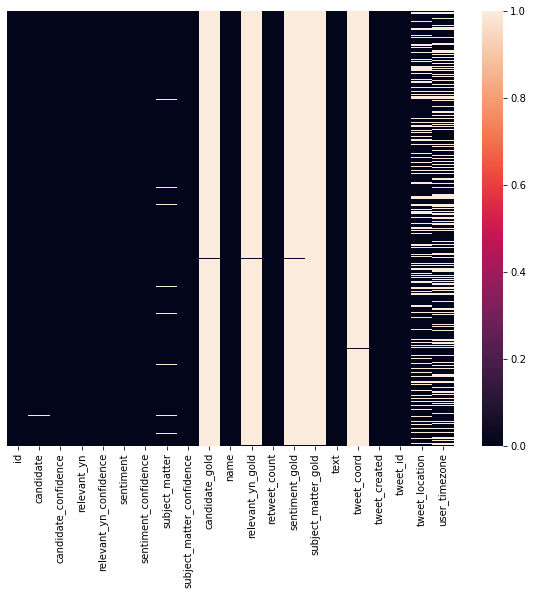

In [76]:
plt.figure(figsize = (10,8))
sns.heatmap(df.isna(),yticklabels=False)

## There are columns which have more than 95% of null values

## Treatiing Missing Values

In [77]:
for i in df.columns:
    if df[i].isnull().sum()/len(df)*100 > 50 : # droping the columns have more than 50% of missing values
        df.drop(i ,axis = 1 ,inplace = True)

In [78]:
df["subject_matter"].fillna(df['subject_matter'].mode()[0],inplace=True)
df["candidate"].fillna(df['candidate'].mode()[0],inplace=True)
df["tweet_location"].fillna(df['tweet_location'].mode()[0],inplace=True)
df["user_timezone"].fillna(df['user_timezone'].mode()[0],inplace=True)

In [79]:
df.isnull().sum()

id                           0
candidate                    0
candidate_confidence         0
relevant_yn                  0
relevant_yn_confidence       0
sentiment                    0
sentiment_confidence         0
subject_matter               0
subject_matter_confidence    0
name                         0
retweet_count                0
text                         0
tweet_created                0
tweet_id                     0
tweet_location               0
user_timezone                0
dtype: int64

<AxesSubplot:>

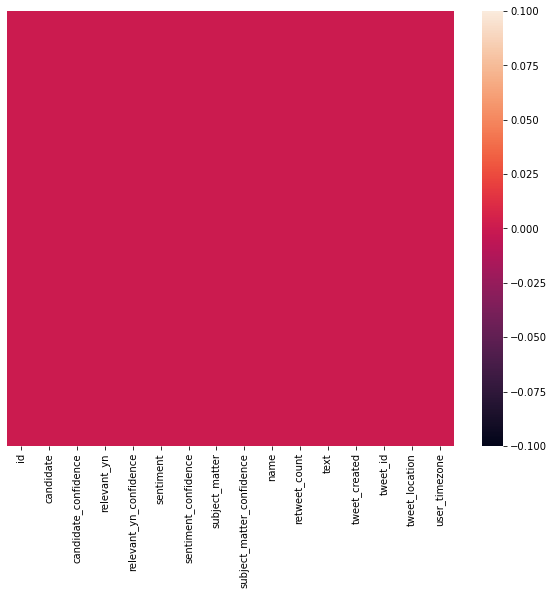

In [80]:
plt.figure(figsize = (10,8))
sns.heatmap(df.isna(),yticklabels=False)

In [81]:
df.sample(5)

,id,candidate,candidate_confidence,relevant_yn,relevant_yn_confidence,sentiment,sentiment_confidence,subject_matter,subject_matter_confidence,name,retweet_count,text,tweet_created,tweet_id,tweet_location,user_timezone
1358,1359,Ted Cruz,1.0,yes,1.0,Positive,0.6937,None of the above,1.0000,electricalbri,188,RT @ChuckNellis: FINALLY a #TedCruz question! ...,2015-08-07 09:42:24 -0700,629694087763865600,"Houston, Texas",Eastern Time (US & Canada)
6804,6805,Donald Trump,1.0,yes,1.0,Negative,1.0000,None of the above,0.6512,Jake_Lester,0,Donald Trump always looks like he was on the b...,2015-08-07 08:14:46 -0700,629672035824873472,"Bloomington, IN",Eastern Time (US & Canada)
7851,7852,No candidate mentioned,1.0,yes,1.0,Negative,1.0000,FOX News or Moderators,0.6774,GeneralSynic,0,"@walkermorin wait, you mean the #gopdebate was...",2015-08-07 08:55:06 -0700,629682185453355008,"Cleveland, OH",Eastern Time (US & Canada)
1196,1197,Jeb Bush,1.0,yes,1.0,Negative,0.6744,Foreign Policy,0.6744,BarracudaMama,5,"RT @AllenWestRepub ""Dear @JebBush #GOPDebate #...",2015-08-07 09:43:55 -0700,629694468791345152,EIC,Central Time (US & Canada)
4658,4659,Chris Christie,1.0,yes,1.0,Neutral,0.6304,None of the above,1.0000,MolonLabe1776us,2,Anyone voting for Chris Christie?\n#GOPDebate ...,2015-08-07 08:46:37 -0700,629680049914953728,"Anaheim, CA",Central Time (US & Canada)


# Q1. Print the total number of positive and negative sentiments.

In [82]:
df["sentiment"].unique()

array(['Neutral', 'Positive', 'Negative'], dtype=object)

In [83]:
print('Total Number of positive Sentiments :',len(df[df['sentiment'] == 'Positive']))

Total Number of positive Sentiments : 2236


In [84]:
print('Total Number of negative Sentiments :',len(df[df['sentiment'] == 'Negative']))

Total Number of negative Sentiments : 8493


In [85]:
print('Total Number positive and negative Sentiments :',len(df[df['sentiment'] == 'Positive']) + len(df[df['sentiment'] == 'Negative']))

Total Number positive and negative Sentiments : 10729


# Q2. Build a sequential LSTM model to predict positive and negative sentiments.

In [86]:
df_new = df[["sentiment", "text"]]
df_new.head()

,sentiment,text
0,Neutral,RT @NancyLeeGrahn: How did everyone feel about...
1,Positive,RT @ScottWalker: Didn't catch the full #GOPdeb...
2,Neutral,RT @TJMShow: No mention of Tamir Rice and the ...
3,Positive,RT @RobGeorge: That Carly Fiorina is trending ...
4,Positive,RT @DanScavino: #GOPDebate w/ @realDonaldTrump...


In [87]:
def remove_tags(string):
    removelist = ""
    result = re.sub('RT','',string) # Remove RT from text         
    result = result.lower()
    return result
df_new['text'] = df_new['text'].apply(lambda cw : remove_tags(cw))

In [88]:
# Removing stopwords
stop_words = set(stopwords.words('english'))
df_new['text'] = df_new['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [89]:
# Lemmatizing text
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
df_new['text'] = df_new.text.apply(lemmatize_text)
df_new.sample(15)

,sentiment,text
7349,Negative,watching #gopdebate.../ garbage opression prej...
4933,Negative,"please tell @realdonaldtrump difference ""hones..."
8503,Negative,#gop candidate asked describe #hillaryclinton ...
4585,Negative,@sbpdl: @megynkelly horrible. seriously. hate ...
3583,Negative,@edwrather: one question last night debate vet...
6400,Neutral,"@walterolson: reaction, @catoinstitute colleag..."
8674,Negative,@rwsurfergirl: @megynkelly posed adult picture...
8477,Negative,@rwsurfergirl: tonight learned @govchristie th...
13217,Negative,@rwsurfergirl: jeb bush reminds elevator music...
8276,Positive,@kimguilfoyle i'm getting fiorina yard signs! ...


In [90]:
# Encoding Labels
reviews = df_new["text"].values
labels = df_new["sentiment"].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [91]:
# Train Test Split
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)

In [92]:
# Tokenizing Sentences
vocab_size = 3000 
oov_tok = ''
embedding_dim = 100
max_length = 200 
padding_type='post'
trunc_type='post'

tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)

test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

# Building Model

In [93]:
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 200, 100)          300000    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              84480     
 nal)                                                            
                                                                 
 dense_4 (Dense)             (None, 24)                3096      
                                                                 
 dense_5 (Dense)             (None, 1)                 25        
                                                                 
Total params: 387,601
Trainable params: 387,601
Non-trainable params: 0
_________________________________________________________________


In [94]:
num_epochs = 5
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1)

Epoch 1/5
293/293 [==============================] - 29s 90ms/step - loss: 1.5708 - accuracy: 0.4448 - val_loss: 0.4258 - val_accuracy: 0.5255
Epoch 2/5
293/293 [==============================] - 27s 92ms/step - loss: -0.1871 - accuracy: 0.5832 - val_loss: -0.5925 - val_accuracy: 0.5331
Epoch 3/5
293/293 [==============================] - 29s 98ms/step - loss: -3.8737 - accuracy: 0.5660 - val_loss: -5.2859 - val_accuracy: 0.4803
Epoch 4/5
293/293 [==============================] - 31s 106ms/step - loss: -19.8539 - accuracy: 0.5649 - val_loss: -18.4242 - val_accuracy: 0.5831
Epoch 5/5
293/293 [==============================] - 27s 94ms/step - loss: -61.8850 - accuracy: 0.5762 - val_loss: -29.5770 - val_accuracy: 0.5639


In [95]:
prediction = model.predict(test_padded)
pred_labels = []
for i in prediction:
    if i >= 0.66:
        pred_labels.append(1)
    elif  i < 0.66 and i >= 0.33:
        pred_labels.append(0)
    else:
        pred_labels.append(-1)

# Q3.
# Based on the model, check the sentiment for the following
# two sentences
# a. 'He is a great leader.'
# b. 'He is a terrible leader.'


# Checking sentiments for the given sentences

In [96]:
sentence = ["He is a great leader.", 
            "He is a terrible leader."]

sequences = tokenizer.texts_to_sequences(sentence)

padded = pad_sequences(sequences, padding='post', maxlen=max_length)
prediction = model.predict(padded)
pred_labels = []

for i in prediction:
    if i >= 0.66:
        pred_labels.append(1)
    elif  i < 0.66 and i >= 0.33:
        pred_labels.append(0)
    else:
        pred_labels.append(-1)
        
for i in range(len(sentence)):
    print(sentence[i])
    if pred_labels[i] == 1:
        s = 'Positive'
    elif pred_labels[i] == 0:
        s = "Neutral"
    else:
        s = 'Negative'
    print("Predicted sentiment : ",s)

He is a great leader.
Predicted sentiment :  Positive
He is a terrible leader.
Predicted sentiment :  Negative
